In [10]:
"""
@author: Crazy Trader
Trading Hours (HKT Timezone) Mon - Fri: 
    HSI Derivatives(Day Session)    : 09:15 - 12:00, 13:00 - 16:30
                   (Night Session)  : 17:15 - 01:00
    HK Equities    (Auction Session): 09:00 - 09:30
                   (Day Session)    : 09:30 - 12:00, 13:00 - 16:08
    US Equities                     : 22:30 - 05:00
    Forex                           : 00:00 - 23:59
Restrictions:
    Trading must be in trading hours
    Trading must be in sufficnet cash
    Option Strike Price is in step of 200
Assumptions:
    Open/Close Rate means Bid/Ask for FX, Close for EQ, and Strike for Options
    Option price based on Interest rate is 0.15% and dividend yield is 4.24%, per year
    no overnight fee incurred
Operations:
    Long with Ask
    Short with Bid
"""

'\n@author: Crazy Trader\nTrading Hours (HKT Timezone) Mon - Fri: \n    HSI Derivatives(Day Session)    : 09:15 - 12:00, 13:00 - 16:30\n                   (Night Session)  : 17:15 - 01:00\n    HK Equities    (Auction Session): 09:00 - 09:30\n                   (Day Session)    : 09:30 - 12:00, 13:00 - 16:08\n    US Equities                     : 22:30 - 05:00\n    Forex                           : 00:00 - 23:59\nRestrictions:\n    Trading must be in trading hours\n    Trading must be in sufficnet cash\n    Option Strike Price is in step of 200\nAssumptions:\n    Open/Close Rate means Bid/Ask for FX, Close for EQ, and Strike for Options\n    Option price based on Interest rate is 0.15% and dividend yield is 4.24%, per year\n    no overnight fee incurred\nOperations:\n    Long with Ask\n    Short with Bid\n'

In [11]:
#%% Library
from functions import *

In [3]:
#%%
initdataset()                                               # initialize Dataset

In [12]:
#%%
initportfolio(10000000, 100)                                # initialize Account Cash, service fee
start   = '2018-09-01 00:00:00'                             # initialize start date
end     = '2019-10-01 23:59:59'                             # initialize start date
mask = (quote['USDHKD'].index > start) & (quote['USDHKD'].index <= end)
backtestperiod = quote['USDHKD'].loc[mask]
count = 0

In [13]:
position = {}                    # NONE, LONG, SHORT
position['HSI']     = 'NONE'     # Close, Volume
position['VHSI']    = 'NONE'     # Close
position['PUT']     = 'NONE'     # 
position['CALL']    = 'NONE'     # 
position['XAUHKD']  = 'NONE'     # Bid, Ask
position['USDTRY']  = 'NONE'     # Bid, Ask
position['XRPUSD']  = 'NONE'     # Bid, Ask
# start looping every 1 minute
for time, reference in backtestperiod.iterrows():
    """ 
    Read-Only Params:
    quote['HSI'].loc[time].Close
    quote['HSI'].loc[time].Volume
    quote['VIX'].loc[time].Close
    quote['VHSI'].loc[time].Close
    
    Trading Methods:
    trade(time, 'XRPUSD', 'LONG',  quote['XRPUSD'].loc[time].Ask, 100000)
    trade(time, 'XRPUSD', 'CLOSE', quote['XRPUSD'].loc[time].Bid, 100000)
    trade(time, 'HSI',    'SHORT', quote['HSI'].loc[time].Close,  10)
    trade(time, 'CALL',   'SHORT', quote['HSI'].loc[time].Close,  100, 26000, 8)
    trade(time, 'HSI',    'CLOSE', quote['HSI'].loc[time].Close,  10)
    trade(time, 'CALL',   'CLOSE', quote['HSI'].loc[time].Close,  0, 0, 0)
    """ 
    #Examples:
    if quote['VIX'].loc[time].Close > 12:
        if position['HSI'] is 'NONE':
            position['HSI']  = trade(time, 'HSI',  'SHORT', quote['HSI'].loc[time].Close, 1)
            option_strike    = ( int(quote['HSI'].loc[time].Close / 200) - 2 ) * 200
            position['CALL'] = trade(time, 'CALL', 'LONG',  quote['HSI'].loc[time].Close, 1, option_strike, time.month)
            
    if quote['VHSI'].loc[time].Close > 20:
        if position['HSI'] is 'NONE':
            position['HSI']  = trade(time, 'HSI',  'SHORT', quote['HSI'].loc[time].Close, 1)
            position['CALL'] = trade(time, 'CALL', 'LONG',  quote['HSI'].loc[time].Close, 1)
            
    if quote['VIX'].loc[time].Close <= 12 and quote['VHSI'].loc[time].Close <= 20:
        if position['HSI'] is not 'NONE':
            position['HSI']  = trade(time, 'HSI',  'CLOSE', quote['HSI'].loc[time].Close, 1)
            position['CALL'] = trade(time, 'CALL', 'CLOSE', quote['HSI'].loc[time].Close, 1)
            
    ### ADD YOUR CODE HERE ###
    
    ### ADD YOUR CODE HERE ###
    # Update position info once a day: Unrealized, realized P&L
    if time.timestamp() % 86400 == 0:
        updatepos(time)

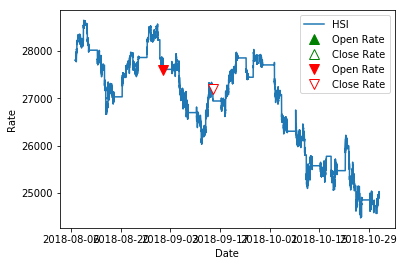

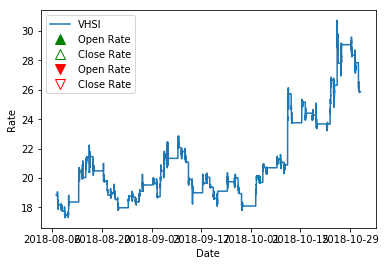

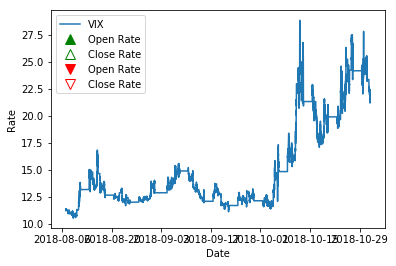

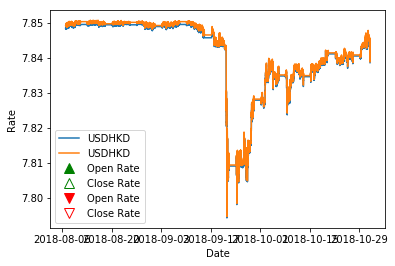

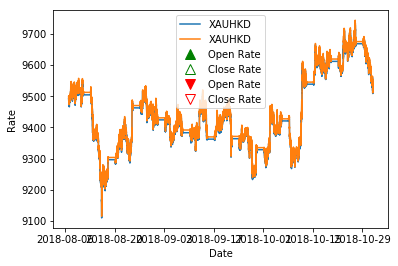

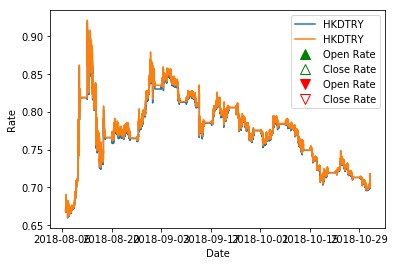

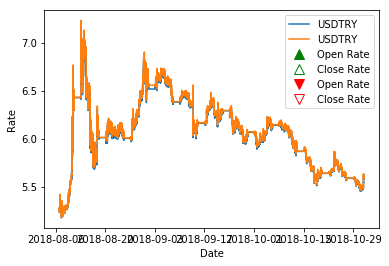

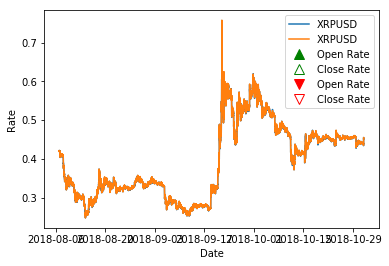

  Product Strike Maturity Position           Open Date     Open Rate Qty  \
0     HSI   None     None    SHORT 2018-09-01 00:01:00  27608.000000   1   
1    CALL  27200        9     LONG 2018-09-01 00:01:00    812.471448   1   

            Close Date Close Rate  Handling  Unrealized P&L  Realized P&L  \
0  2018-09-14 23:43:00      27206       200               0     202.00000   
1  2018-09-14 23:43:00    436.472       200               0    -575.99901   

         P&L%  
0  0.00731672  
1   -0.708947  
{'initial': 10000000, 'fee': 100, 'cash': 9999226.000989608, 'incurred fee': 400, 'P&L': -7.739990103915333e-05}


In [14]:
#%% Export Portfolio
portfolio, log = exporttrades()
print (log)
print (portfolio)